#Assignment 1 submission

Group members: Divya Sasidharan, Poornima Venkatesha, Sinchana Eshwarappa Prameela

In [0]:
from google.colab import drive; drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.getcwd()

'/content'

In [0]:
%tensorflow_version 2.x

# Imports

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [0]:
from datasets import MNISTDataset
print(tf.__version__)

2.2.0-rc3


# Loading the data

We can see that there are 60,000 training examples and 10,000 test examples. 

In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #tuple of numpy arrays

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


We can plot a training image and see how it looks. The corresponding label is also printed and we can see that it matches with the image.


label = 4


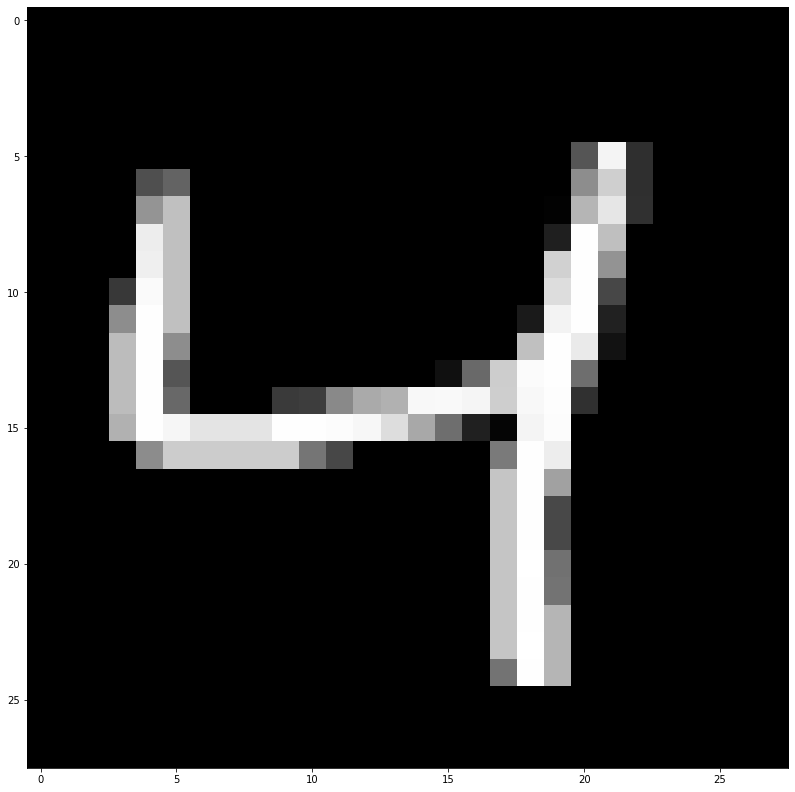

In [0]:
print("label = "+str(train_labels[2]))
plt.imshow(train_images[2], cmap="Greys_r")

# Setup

Next, we flatten the 28x28 array to a vector of 784 numbers and intialize the model parameters. 

Initializing the weight variables to zeros would not work well. If all the weights are same, then they all will have the same error and the model will not learn anything. The best option is to randomly initilaiizing them between such as -0.1 and 0.1.

In [0]:
data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

train_steps = 1000
learning_rate = 0.5

# adding the weights connecting the input to the hidden layer
W1 = tf.Variable(tf.random.uniform([784, 50],minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32))
b1 = tf.Variable(np.ones(50, dtype=np.float32))

# adding the weights connecting the hidden layer to the output layer
W2 = tf.Variable(tf.random.uniform([50, 10],minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32))
b2 = tf.Variable(np.zeros(10, dtype=np.float32))

# Training loop

We train the model using gradient descent to update the weights and the bias variables to reduce the loss.

We have used ReLu activation function for our model. 

In [0]:
#start of training
for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()   
    with tf.GradientTape(persistent=True) as tape:  
          hidden_out = tf.matmul(img_batch, W1)+ b1
          hidden_out = tf.nn.relu(hidden_out)
          logits = tf.matmul(hidden_out, W2) + b2        
          xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=lbl_batch))       
          
    grads2 = tape.gradient(xent, [W2, b2])
    grads1 = tape.gradient(xent, [W1, b1])
    
    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])    
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

Loss: 2.5365843772888184 Accuracy: 0.0703125
Loss: 0.2215600609779358 Accuracy: 0.9296875
Loss: 0.3015839159488678 Accuracy: 0.9296875
Loss: 0.2519647777080536 Accuracy: 0.9453125
Loss: 0.2301015704870224 Accuracy: 0.921875
Starting new epoch...
Loss: 0.12148910015821457 Accuracy: 0.9609375
Loss: 0.21079066395759583 Accuracy: 0.9375
Loss: 0.15173682570457458 Accuracy: 0.9140625
Loss: 0.09893747419118881 Accuracy: 0.96875
Loss: 0.2211901694536209 Accuracy: 0.9375
Starting new epoch...


# Testing

In [0]:
#Accuracy check on the Test set
h_layer=tf.matmul(data.test_data, W1) + b1
hidden_out = tf.nn.relu(h_layer)
test_preds = tf.argmax(tf.matmul(hidden_out,W2) + b2, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.9606, shape=(), dtype=float32)


# Few observations

1. Increasing the training steps gives better accuracy results, but there is no significant difference.

2. Increasing the learning rate also gave us better accuracy results. When the learning rate is 0.1, accuracy was 92%. By increasing it to 0.5, we got an accuracy of 96%, which is really good given that we have used only one hidden layer. But increasing it further does not improve the accuracy. Increase in epoch also resulted in good accuracy of 97% and above.


3. Changing the weight initializations makes a lot of difference in the results. The accuracy significantly decreases if the weights are initialized to 0, and also if the initializations are farther from 0. For example, setting the weights between [-0.2 , 0.2] gave an accuracy of 85%. The best initializations seems to be between -0.1 and 0.1.

4. Modifying the hidden layer sizes or adding more hidden layers makes no significant differences to the accuracy. The accuracy at size 50 is almost same as the accuracy at 500. This proves that MNIST dataset can give good results even with a simple model. 

# Evaluation

We can see from the confusion matrix that 0 is most commonly being incorrectly predicted as 6. 1 as 8, 2 also as 8, 3 as 5, and so on.

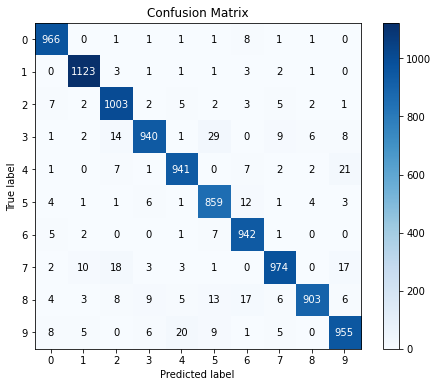

In [0]:
! pip install -q scikit-plot
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    test_labels, 
    test_preds,
    figsize=(8,6))

# Correct and incorrect predictions

We can see from the following images the correctly classified images and the incorrectly classified ones. For this run, 9608  instances are classified correctly and 392 are instances classified incorrectly. The correctly classified images are clear and there seems to be no ambiguity in classifying them. The incorrectly classified images are ambiguous and we can see why they were misclassified. For example, 5 and 6 can be confused together since they have a common loop. 

9606  instances classified correctly
394  instances classified incorrectly


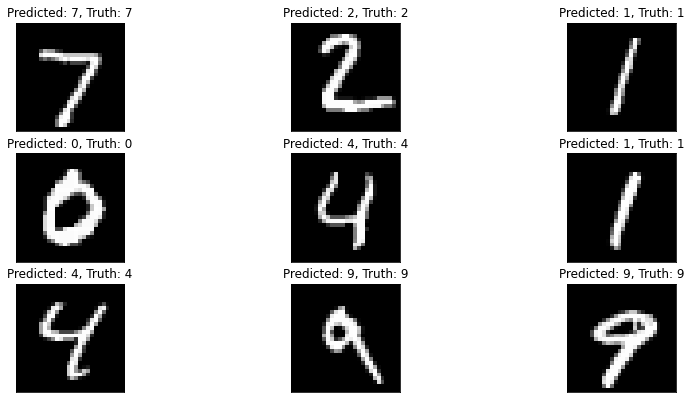

In [0]:
predicted_classes = test_preds

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == test_labels)[0]
incorrect_indices = np.nonzero(predicted_classes != test_labels)[0]

print(len(correct_indices)," instances classified correctly")
print(len(incorrect_indices)," instances classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (14,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(test_images[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        test_labels[correct]))
    plt.xticks([])
    plt.yticks([])

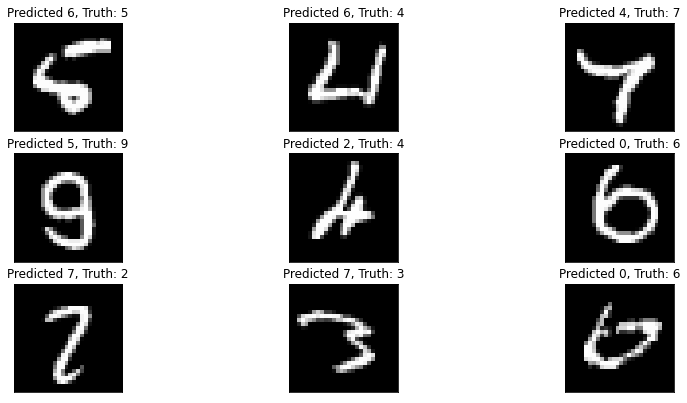

In [0]:
# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(test_images[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       test_labels[incorrect]))
    plt.xticks([])
    plt.yticks([])

# Fashion MNIST implementation

We perform the same steps as above for Fashion MNIST dataset.

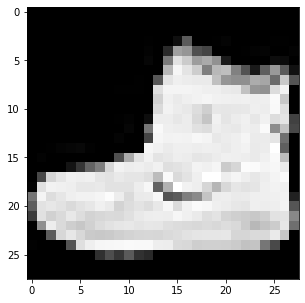

In [0]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.figure(figsize = (28,5))
plt.imshow(train_images[0], cmap="Greys_r")

We add two hidden layers with size 450 and 250 neurons. With Fashion MNIST we see that even with two hidden layers, the accuracy is not much, only ~ 84%. Increasing the learning rate also does not improve the accuracy. Infact, it decreases it. 

In [0]:
data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

train_steps = 1000
learning_rate = 0.1

# adding the weights connecting the input to the hidden layer 1
W1 = tf.Variable(tf.random.uniform([784, 450],minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32))
b1 = tf.Variable(np.ones(450, dtype=np.float32))

# adding the weights connecting the hidden layer1 to the hidden layer 2
W2 = tf.Variable(tf.random.uniform([450, 250],minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32))
b2 = tf.Variable(np.ones(250, dtype=np.float32))

# adding the weights connecting the hidden layer to the output layer
W3 = tf.Variable(tf.random.uniform([250, 10],minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32))
b3 = tf.Variable(np.zeros(10, dtype=np.float32))

#start of training
for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()   
    with tf.GradientTape(persistent=True) as tape:  
          hidden_out1 = tf.matmul(img_batch, W1)+ b1
          hidden_out1 = tf.nn.relu(hidden_out1)
          hidden_out2 = tf.matmul(hidden_out1, W2) + b2
          hidden_out2 = tf.nn.relu(hidden_out2)
          logits = tf.matmul(hidden_out2, W3) + b3        
          xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=lbl_batch))       

    grads3 = tape.gradient(xent, [W3, b3])    
    grads2 = tape.gradient(xent, [W2, b2])
    grads1 = tape.gradient(xent, [W1, b1])
    

    W3.assign_sub(learning_rate * grads3[0])
    b3.assign_sub(learning_rate * grads3[1])
    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])    
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

Loss: 3.1992249488830566 Accuracy: 0.0859375
Loss: 0.7917433977127075 Accuracy: 0.6796875
Loss: 0.5673665404319763 Accuracy: 0.7734375
Loss: 0.41896316409111023 Accuracy: 0.8671875
Loss: 0.4732116460800171 Accuracy: 0.796875
Starting new epoch...
Loss: 0.4507717788219452 Accuracy: 0.828125
Loss: 0.552952766418457 Accuracy: 0.796875
Loss: 0.4740282893180847 Accuracy: 0.875
Loss: 0.4153825640678406 Accuracy: 0.828125
Loss: 0.42087802290916443 Accuracy: 0.859375
Starting new epoch...


In [0]:
#Accuracy check on the Test set
h_layer1=tf.matmul(data.test_data, W1) + b1
hidden_out1 = tf.nn.relu(h_layer1)
h_layer2=tf.matmul(hidden_out1, W2) + b2
hidden_out2 = tf.nn.relu(h_layer2)
test_preds = tf.argmax(tf.matmul(hidden_out2,W3) + b3, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.8476, shape=(), dtype=float32)


# Evaluation

We can see from the confusion matrix that 0 (T-shirt) is commonly incorrectly predicted as 6 (Shirt).

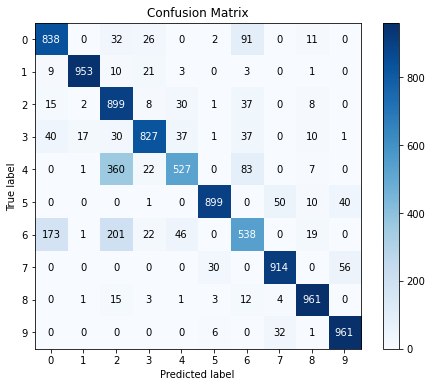

In [0]:
skplt.metrics.plot_confusion_matrix(
    test_labels, 
    test_preds,
    figsize=(8,6))

8317  instances classified correctly
1683  instances classified incorrectly


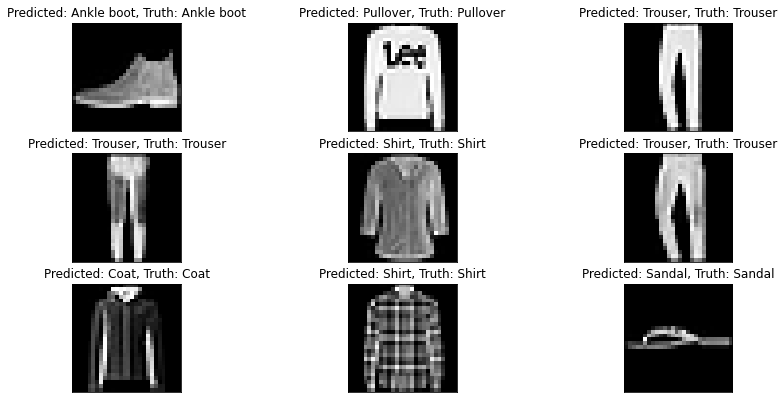

In [0]:
predicted_classes = test_preds
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9
# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == test_labels)[0]
incorrect_indices = np.nonzero(predicted_classes != test_labels)[0]

print(len(correct_indices)," instances classified correctly")
print(len(incorrect_indices)," instances classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (14,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(test_images[correct].reshape(28,28), cmap='gray', interpolation='none')
    predict_index = predicted_classes[correct]
    true_index = test_labels[correct]
    plt.title(
      "Predicted: {}, Truth: {}".format(fashion_mnist_labels[predict_index],
                                        fashion_mnist_labels[true_index]))
    plt.xticks([])
    plt.yticks([])


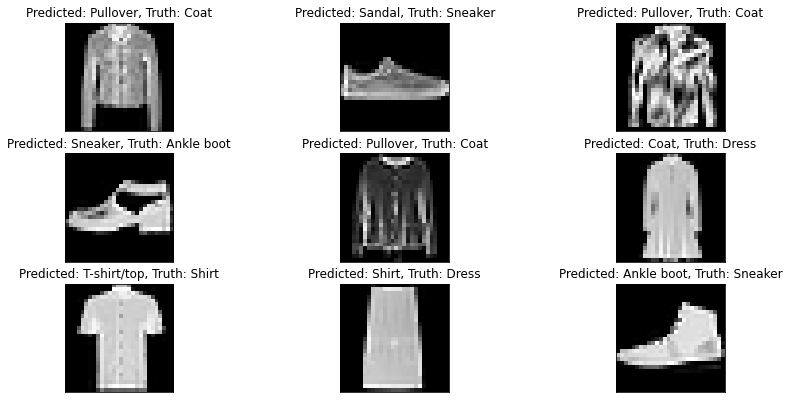

In [0]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9
# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(test_images[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    predict_index = predicted_classes[incorrect]
    true_index = test_labels[incorrect]
    plt.title(
      "Predicted: {}, Truth: {}".format(fashion_mnist_labels[predict_index],
                                        fashion_mnist_labels[true_index]))
    plt.xticks([])
    plt.yticks([])

# Final conclusions

We added a hidden layer to our model for MNIST dataset which gave us a good accuracy of 96%. We found that MNIST is not a very complex dataset and gives good results even for a simple model. 

Fashion MNIST dataset is much more complex and challenging. 

We also note that some parts of the code such as creating layers, weight and bias updation can be replaced with higher level interfaces using APIs from Keras. 
Adam optimizer can be used as a gradient descent optimization algorithm which will try to find proper weights and biases for the network by minimizing the cost function.

reference:
<reference>https://medium.com/@curiousily/tensorflow-for-hackers-part-ii-building-simple-neural-network-2d6779d2f91b